In [6]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [188]:
# Model 1a: 1 predator, 1 prey without carrying capacity

# x = population density for prey
# y = population density for predator

# Initializing parameters
a = 0.5 # prey growth rate
b = 0.02 # predator kill rate
c = 0.05 # predator death rate
d = 0.01 # predator growth rate from eating prey

# Defining Lotka-Volterra differential equations
def dSdt1(S, t):
    x, y = S
    return [a*x - b*x*y,
            -c*y + d*x*y
           ]

# Initializing population densities
x0 = float(input("Enter the initial prey population: ")) # for example: 60
y0 = float(input("Enter the initial predator population: ")) # for example: 10
S0 = (x0, y0)

t = np.linspace(0, 300, 1000) # time array

# SciPy ODEint Solver
sol1 = odeint(dSdt1, S10, t)

sol1_x = sol1[:, 0] # prey population over time
sol1_y = sol1[:, 1] # predator population over time

Enter the initial prey population:  60
Enter the initial predator population:  10


In [190]:
# Runge-Kutta ODE Solver
def odeSolver(S0, dSdt, total_time, time_steps):
    """
    Solves a system of ODEs using the "RK4" Runge-Kutta method

    Parameters:
        S0: (list) representing all initial populations
        dSdt: function representing the system of ODEs
            -takes current populations and time as parameters
            -returns a list describing the LV derivative equations 
        total_time: (float) total time frame for which the ODE is solved in
        time_steps: (int) number of time points over total_time interval

    Returns:
        S: (NumPy array) array of shape (n, time_steps) containing the population values at each time step
            -n = number of variables
        t: (NumPy array) array containing time points corresponding to the time steps from 0 to total_time
    """
    n = len(S0) # number of variables
    S = np.zeros((n, time_steps)) # solution array
    t = np.linspace(0, total_time, time_steps) # time array
    h = t[1] - t[0] # time step size

    # Defining initial values
    for i in range(n):
        S[i, 0] = S0[i]

    # Implementing Runge-Kutta equations
    for i in range(time_steps - 1):
        k1 = np.array(dSdt(S[:, i], t[i]))
        k2 = np.array(dSdt(S[:, i] + h/2 * k1, t[i] + h/2))
        k3 = np.array(dSdt(S[:, i] + h/2 * k2, t[i] + h/2))
        k4 = np.array(dSdt(S[:, i] + h * k3, t[i] + h))
        
        S[:, i + 1] = S[:, i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return S, t

S, t = odeSolver(S0, dSdt1, 300, 1000)

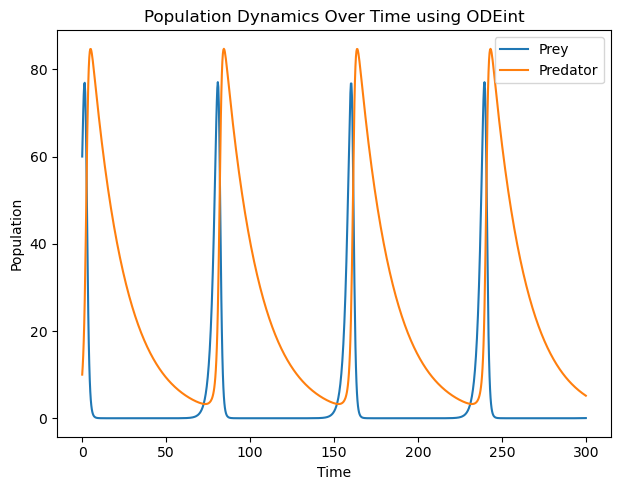

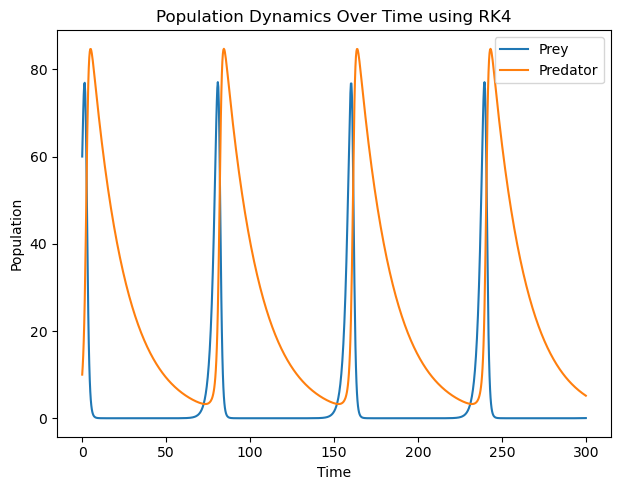

In [192]:
# Plotting populations over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, sol1_x, label = "Prey")
plt.plot(t, sol1_y, label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using ODEint")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(t, S[0], label = "Prey")
plt.plot(t, S[1], label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using RK4")
plt.tight_layout()
plt.show()

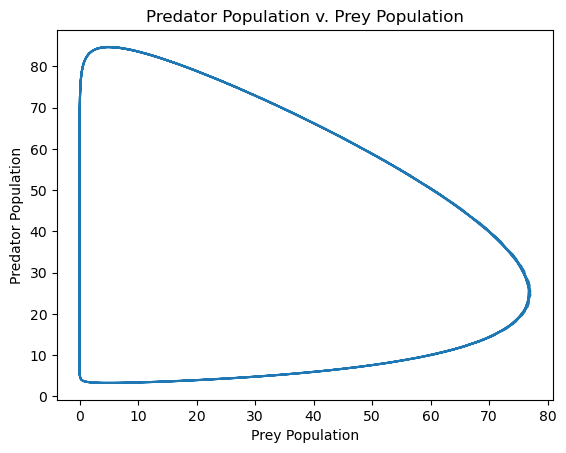

In [194]:
# Plotting the prey v. predator phase plane
plt.plot(sol1_x, sol1_y)
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.title("Predator Population v. Prey Population")
plt.show()

In [196]:
# Model 1b: 1 predator, 1 prey with carrying capacity

# carrying capacity of an environment = the maximum population size of a biological species that can be 
# sustained by that specific environment, given the food, habitat, water, and other resources available (Wikipedia)

# Initializing parameters
k1 = 300 # carrying capacity of prey population
k2 = 200 # carrying capacity of predator population

# Defining Lotka-Volterra differential equations
def dSdt2(S, t):
    x, y = S
    return [a*x*(1-x/k1) - b*x*y,
            -c*y + d*x*y*(1-y/k2)
           ]

# Initializing population densities
x0 = float(input("Enter the initial prey population: ")) # for example: 60
y0 = float(input("Enter the initial predator population: ")) # for example: 10
S0 = (x0, y0)

t = np.linspace(0, 300, 1000) # time array

# SciPy ODEint Solver
sol2 = odeint(dSdt2, S0, t)

sol2_x = sol2[:, 0] # prey population over time
sol2_y = sol2[:, 1] # predator population over time

Enter the initial prey population:  60
Enter the initial predator population:  10


In [198]:
# Runge-Kutta ODE Solver
S, t = odeSolver(S0, dSdt2, 300, 1000)

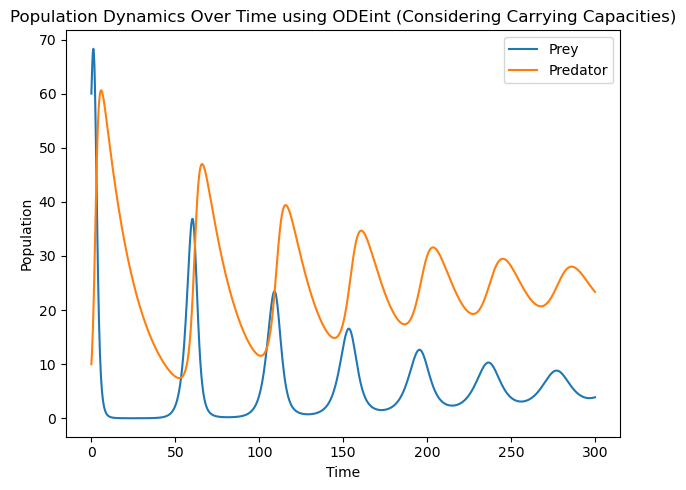

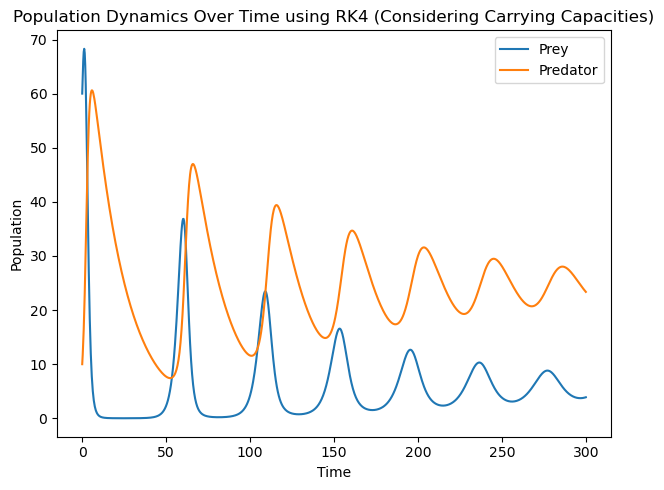

In [200]:
# Plotting populations over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, sol2_x, label = "Prey")
plt.plot(t, sol2_y, label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using ODEint (Considering Carrying Capacities)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(t, S[0], label = "Prey")
plt.plot(t, S[1], label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using RK4 (Considering Carrying Capacities)")
plt.tight_layout()
plt.show()

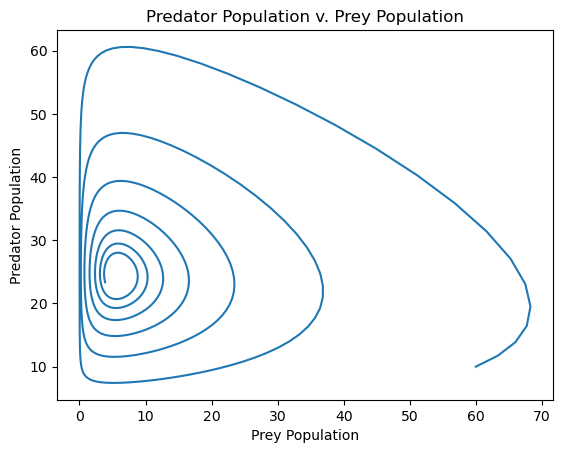

In [202]:
# Plotting the prey v. predator phase plane
plt.plot(sol2_x, sol2_y)
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.title("Predator Population v. Prey Population")
plt.show()